# kmeans (clusterizacion)

## 1. Librerias y configuraciones previas


In [94]:
#!pip install ydata-profiling
import pandas as pd
#from ydata_profiling import ProfileReport
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Funciones externas
# ==============================================================================
from funciones import multiple_plot

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

## 2. Funciones

In [95]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from funciones import multiple_plot

## 3. Carga del dataset

In [96]:
#Se crea un dataframe d con los datos obtenidos de archivo de entrada
d=pd.read_csv('/content/01_ventas_2022_zafiro_Prep.csv')

In [ ]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive
#import os

#drive.mount('/gdrive')

In [ ]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [97]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31695 entries, 0 to 31694
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mes                     31695 non-null  object
 1   Edad Empresa Cliente    31695 non-null  int64 
 2   Exhibidor               31695 non-null  object
 3   Recuento de Referencia  31695 non-null  int64 
 4   Suma de Cant. Dev.      31695 non-null  int64 
 5   Suma de Cant. Neta      31695 non-null  int64 
 6   Suma de Vta. - IVA      31695 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.7+ MB


## 4. Visualización de datos

### Variables de entrada

In [98]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,Mes,Exhibidor
0,CUARTO TRIMESTRE,NO
1,CUARTO TRIMESTRE,SI


In [99]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()
d[numCols].head(2)

,Edad Empresa Cliente,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA
0,4,12,0,39,203702
1,3,32,0,71,744018


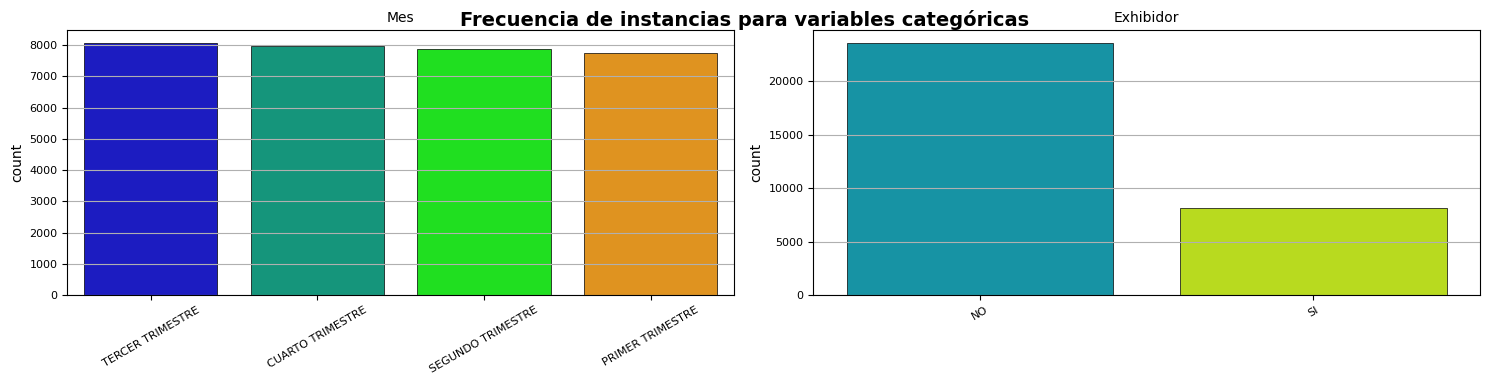

In [100]:
##Visualización de frecuencia de instancias para variables categóricas
multiple_plot(2, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

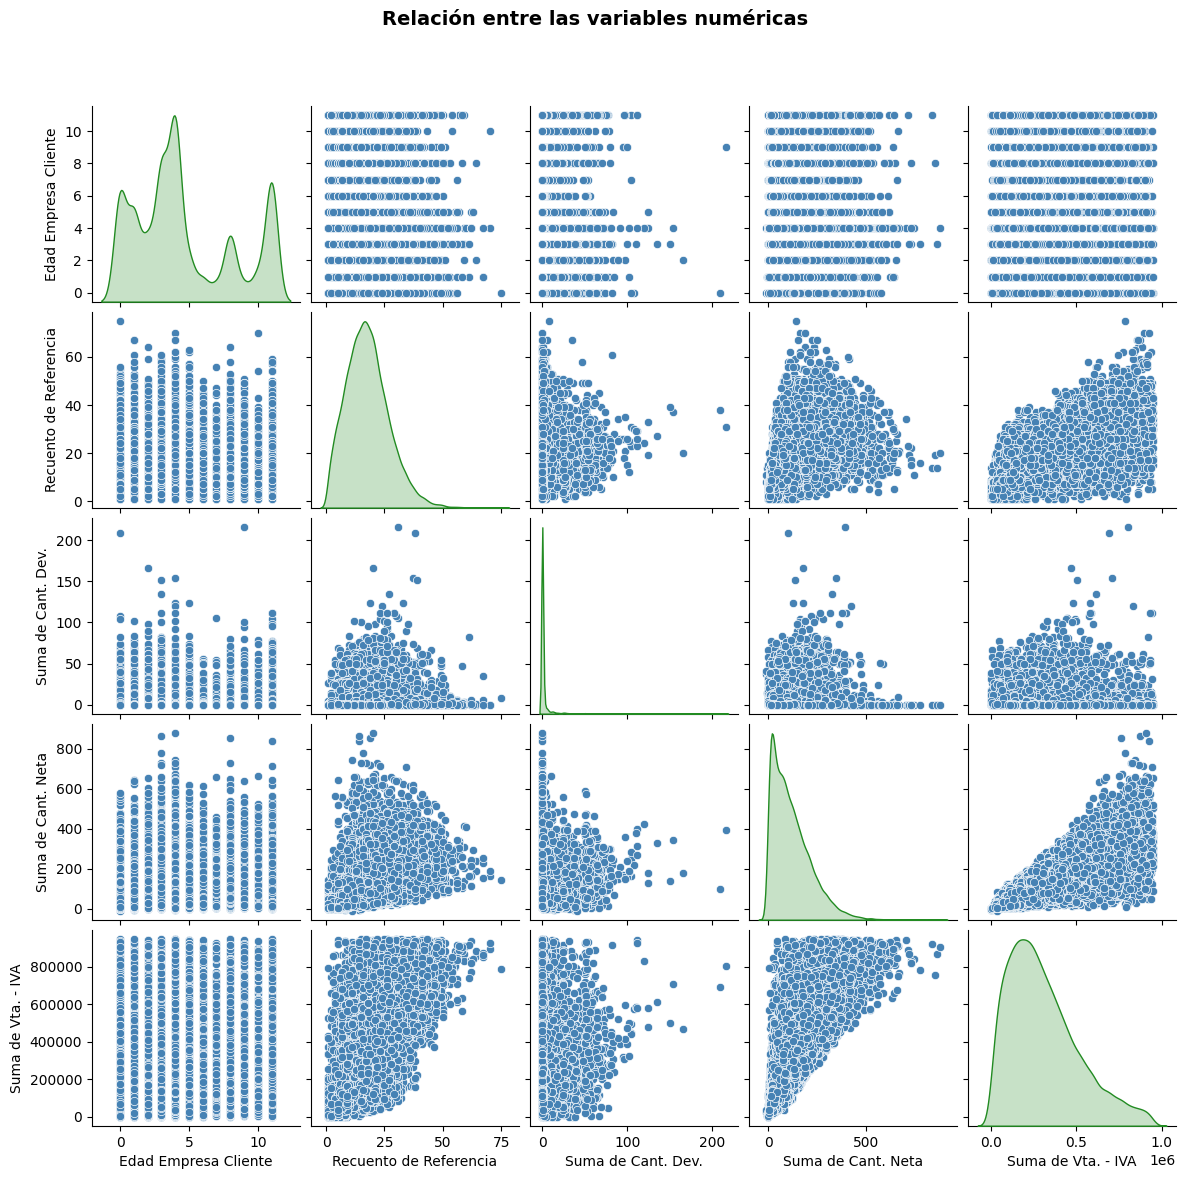

In [101]:
#Visualización de variables numéricas con respecto al precio
multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

In [102]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

## 5. Preparación de datos

### Creación de Variables Dummies

In [103]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31695 entries, 0 to 31694
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mes                     31695 non-null  object
 1   Edad Empresa Cliente    31695 non-null  int64 
 2   Exhibidor               31695 non-null  object
 3   Recuento de Referencia  31695 non-null  int64 
 4   Suma de Cant. Dev.      31695 non-null  int64 
 5   Suma de Cant. Neta      31695 non-null  int64 
 6   Suma de Vta. - IVA      31695 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.7+ MB


In [104]:
# Aplicación de la función de get_dummies

d=pd.get_dummies(d, columns=['Exhibidor'], drop_first=True)

In [105]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31695 entries, 0 to 31694
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mes                     31695 non-null  object
 1   Edad Empresa Cliente    31695 non-null  int64 
 2   Recuento de Referencia  31695 non-null  int64 
 3   Suma de Cant. Dev.      31695 non-null  int64 
 4   Suma de Cant. Neta      31695 non-null  int64 
 5   Suma de Vta. - IVA      31695 non-null  int64 
 6   Exhibidor_SI            31695 non-null  bool  
dtypes: bool(1), int64(5), object(1)
memory usage: 1.5+ MB


In [106]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar label encoding a la columna 'Mes'
d['Mes'] = label_encoder.fit_transform(d['Mes'])

# Ver las correspondencias entre las etiquetas y los valores originales
print("Correspondencias entre etiquetas y valores originales:")
for label, original_value in enumerate(label_encoder.classes_):
    print(f"{label}: {original_value}")

Correspondencias entre etiquetas y valores originales:
0: CUARTO TRIMESTRE
1: PRIMER TRIMESTRE
2: SEGUNDO TRIMESTRE
3: TERCER TRIMESTRE


In [107]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31695 entries, 0 to 31694
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Mes                     31695 non-null  int64
 1   Edad Empresa Cliente    31695 non-null  int64
 2   Recuento de Referencia  31695 non-null  int64
 3   Suma de Cant. Dev.      31695 non-null  int64
 4   Suma de Cant. Neta      31695 non-null  int64
 5   Suma de Vta. - IVA      31695 non-null  int64
 6   Exhibidor_SI            31695 non-null  bool 
dtypes: bool(1), int64(6)
memory usage: 1.5 MB


## 6. Creación del modelo

### Dividir el conjunto de datos

### Escalar Variables

### Creación del modelo

In [108]:
# Cargar librerías de clustering
from sklearn.cluster import KMeans

In [109]:
# Método del codo
medias=range(2,20)
varianzas=[]

for k in medias:
  #Creamos el modelo
  modelo=KMeans(n_clusters=k)
  modelo.fit(d)
  varianzas.append(modelo.inertia_)

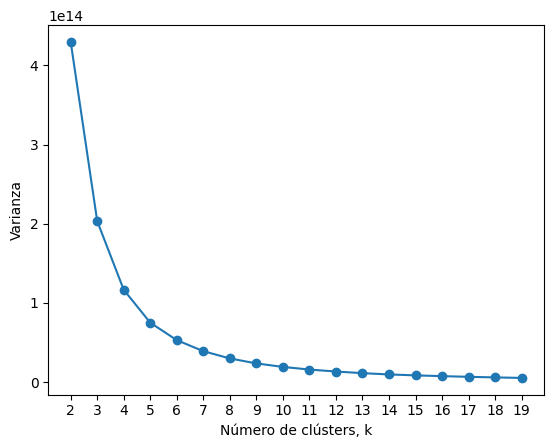

In [110]:
# Grafiquemos el método del codo
import matplotlib.pyplot as plt

plt.plot(medias,varianzas,'-o')
plt.xlabel('Número de clústers, k')
plt.ylabel('Varianza')
plt.xticks(medias)
plt.show()

In [121]:
# El punto 'Aproximado' donde hay un quiebre 'un codo', quiere decir que a partir de allí, es muy 'suave', la ganancia
# en variablidad respecto a los k centroides

# El algoritmo de KMeans, requiere de un número k
modelo=KMeans(n_clusters=5,max_iter=300)
modelo.fit(d)

KMeans(n_clusters=5)

In [122]:
centroides= pd.DataFrame(modelo.cluster_centers_,columns=d.columns.values)

In [123]:
centroides.round(3)

,Mes,Edad Empresa Cliente,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA,Exhibidor_SI
0,2,5,21,2,150,369847,0
1,1,5,16,2,86,225196,0
2,2,5,25,3,218,541643,0
3,1,5,29,2,288,776939,0
4,2,4,9,2,30,88063,0


In [124]:
# Asignemos un clúster o grupo a cada registro
d['cluster']=modelo.predict(d)
d.head()

,Mes,Edad Empresa Cliente,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA,Exhibidor_SI,cluster
0,0,4,12,0,39,203702,False,1
1,0,3,32,0,71,744018,True,3
2,1,5,17,0,98,201679,False,1
3,2,1,7,0,65,156384,False,4
4,1,8,9,0,14,154549,True,4


In [125]:
# Perfilamiento
print(d.cluster.value_counts())
centroides.round(0)

cluster
1    9238
4    8356
0    7227
2    4483
3    2391
Name: count, dtype: int64


,Mes,Edad Empresa Cliente,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA,Exhibidor_SI
0,2,5,21,2,150,369847,0
1,1,5,16,2,86,225196,0
2,2,5,25,3,218,541643,0
3,1,5,29,2,288,776939,0
4,2,4,9,2,30,88063,0


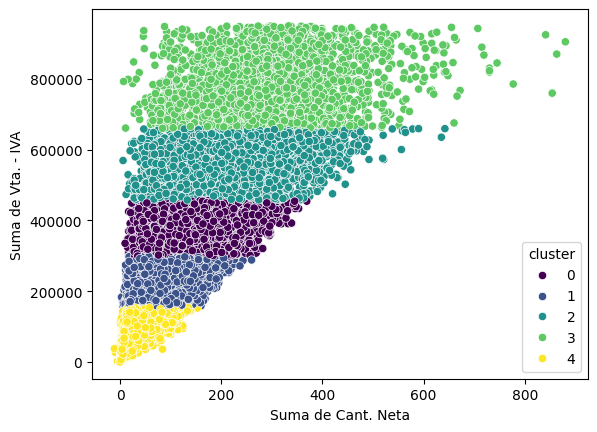

In [126]:
sns.scatterplot(x='Suma de Cant. Neta', y='Suma de Vta. - IVA', hue='cluster', data=d, palette='viridis')
plt.show()